<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/WOMAC_Reg_Version_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Latest/KOA_EMG_WOMAC__2022.08.16_Final_WO-tempo-spatial.csv")


In [3]:
dataset.head(10)

,Patient ID,WOMAC_total,WOMAC Severity,CCI_TA-RF,CCI_G-MH,CCI_TA-MH,CCI_G-RF,CCI_TA-G,CCI_MH-RF,CCI_L-H,...,TA-G-100,Stance_CCI_TA-RF,Stance_CCI_G-MH,Stance_CCI_TA-G,Swing_CCI_TA-RF,Swing_CCI_G-MH,Swing_CCI_TA-G,swing/stance_cci(TA_RF),swing/stance_cci(G-MH),swing/stance_CCI(TA-G)
0,10193,40,Moderate,144.9,66.0,108.1,86.2,171.7,87.1,183.8,...,234.689409,115.016739,82.560104,129.779021,212.427472,35.934817,266.326016,1.846927,0.435256,2.052150
1,10193,42,Moderate,99.1,123.6,98.9,123.6,109.4,145.9,215.6,...,130.854095,80.799114,118.800065,87.596328,120.058278,131.061267,145.432434,1.485886,1.103209,1.660257
2,11407,42,Moderate,90.4,160.1,80.7,164.8,88.5,110.4,217.2,...,109.781099,64.522568,185.837798,53.250781,118.951867,119.206854,144.415087,1.843570,0.641456,2.711981
3,11407,41,Moderate,146.6,196.2,136.4,184.8,123.0,106.3,293.3,...,117.902928,157.259039,213.969267,126.550560,134.834096,168.262739,117.370956,0.857401,0.786387,0.927463
4,12435,23,Mild,147.9,153.5,85.9,305.4,90.3,40.4,268.2,...,76.648348,158.726742,198.202890,94.353370,135.926913,82.676272,83.944362,0.856358,0.417129,0.889681
5,12435,47,Moderate,99.4,55.4,93.6,58.7,150.9,108.4,145.9,...,44.685556,147.257611,72.130138,197.046837,48.532762,29.851684,80.509844,0.329577,0.413859,0.408582
6,12521,19,Mild,90.0,91.0,92.0,88.7,115.0,136.7,174.1,...,65.433386,86.971580,107.723821,106.343048,93.422362,64.138358,128.642708,1.074171,0.595396,1.209696
7,12521,53,Moderate,133.5,93.6,121.1,100.7,146.5,100.4,214.5,...,169.644154,112.746870,109.750454,131.151480,156.402708,68.811402,170.867378,1.387202,0.626981,1.302825
8,12687,74,Severe,193.3,130.3,207.0,129.6,162.9,140.1,295.2,...,144.402551,223.637121,142.868454,166.702324,155.574614,109.404210,155.958741,0.695656,0.765769,0.935552
9,12687,74,Severe,129.5,115.1,88.9,180.9,103.8,79.0,229.5,...,107.222917,139.496753,123.489941,101.890803,118.112704,102.404559,106.992896,0.846706,0.829254,1.050074


In [4]:
dataset.shape

(150, 785)

In [5]:
X = dataset.iloc[:,3:]
y = dataset.iloc[:, 1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


In [8]:
print(y_pred.shape)

(30,)


In [9]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,y_pred)

-2.8701995578947614

In [10]:
r_sq = lin_reg.score(X, y)
print(r_sq)

0.10700997970639947


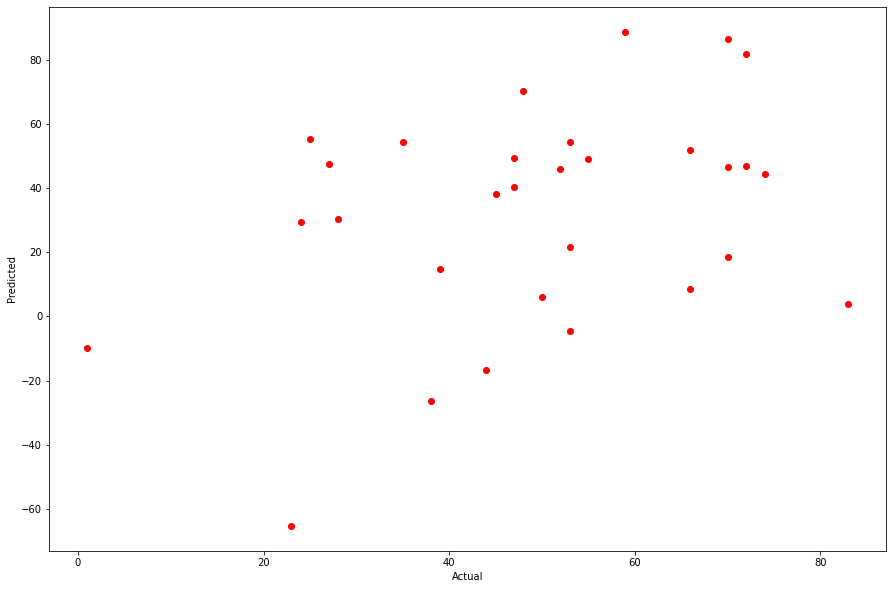

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred, color = "red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [12]:
pred_y_df=pd.DataFrame(
    {
        "Actual Value":y_test,
        "Predicted Value":y_pred,
        "Difference":y_test-y_pred
    }
)

pred_y_df


,Actual Value,Predicted Value,Difference
114,39,14.884910,24.115090
62,50,6.149251,43.850749
33,59,88.644060,-29.644060
107,35,54.404996,-19.404996
7,53,54.228985,-1.228985
100,47,40.306719,6.693281
40,72,81.654523,-9.654523
86,53,21.782085,31.217915
76,72,46.917533,25.082467
71,27,47.438013,-20.438013


In [13]:
# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [ 2.20324146e-03 -7.74171500e-02  2.09578764e-02 -2.10941274e-02
  4.35428280e-04  9.03563216e-02  4.00469325e-02 -9.01240877e-03
 -3.49559142e-04 -6.66907149e-04 -7.20825049e-04  2.83366427e-04
 -1.94384733e-03  5.23170336e-02 -7.27623118e-02 -6.15402358e-03
  7.17661054e-02  1.98470086e-02  5.02381138e-02 -6.39419156e-02
  8.04466959e-02 -4.26898590e-03 -9.13304002e-03 -8.24422309e-03
  8.83169477e-03 -2.42703539e-02 -5.94027644e-02  5.56795673e-02
 -1.27762853e-03  8.91782745e-04  5.10067082e-03 -1.57832135e-03
 -7.96900384e-03  8.85840367e-03  1.81560465e-04 -8.04586663e-04
 -3.59677000e-03  4.40189306e-03 -9.17597303e-03 -6.65303275e-03
  1.07932320e-02  4.15417661e-03  2.58765690e-03  2.70261280e-03
  7.29350229e-03 -6.09380093e-03  5.10603344e-04  2.53741966e-05
  7.87091496e-05  4.96160793e-04 -8.49074476e-03  1.02125568e-02
  7.34326583e-03  7.48985856e-03 -5.16225697e-02  9.77721381e-03
  3.50665327e-03 -3.07782708e-03  2.48699693e-02 -1.02921573e-02
  1.54902

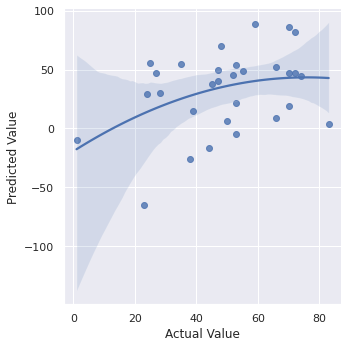

In [17]:
import seaborn as sns


scatter_poly2 = sns.lmplot(
    data = pred_y_df, 
    x = "Actual Value",
    y = "Predicted Value",
    order = 2
)

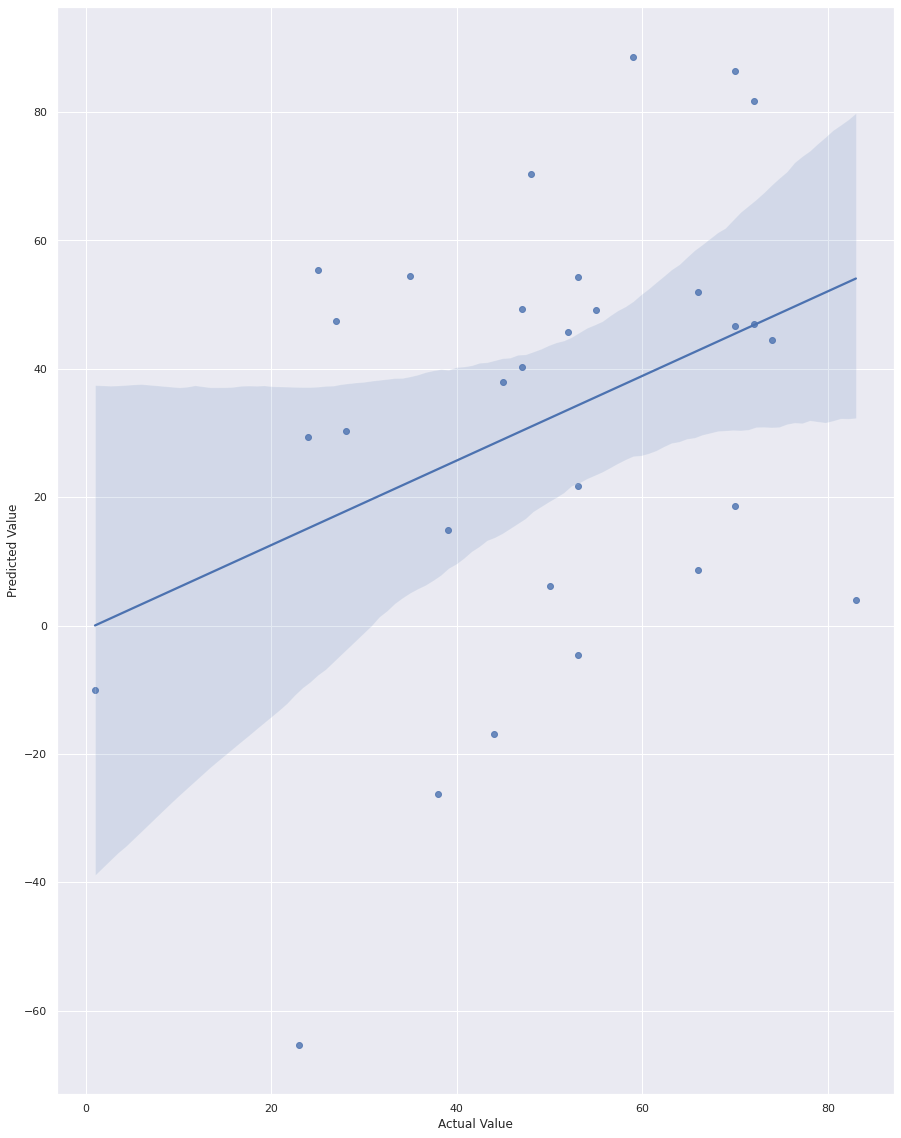

In [18]:
sns.regplot(x="Actual Value", y="Predicted Value", data=pred_y_df);